# Data Science en pratique
Arthur Llau, arthur@flowlity.com


## Cours 2: Feature engineering I

### Objectif du cours : Variables Catégorielles et valeurs manquantes
-  Présenter les variables catégorielles, comment les visualiser et commment les manipuler
-  Donner des stratégies pour compléter des valeurs manquantes.
-  TP de mise en pratique

### Variables catégorielles

Les variables catégorielles sont des variables qualitatives qui caractérisent un attribut d'une observation.
Par exemple, une variable catégorielle pour une voiture est sa couleur. Certaines de ces variables peuvent être numériques et ordonnées, elles sont dites ordinales comme la note d'un étudiant à un examen.

### 1. Comment les réperer et les visualiser ?


Les données utilisées pour illuster cette section proviennent d'un dataset répertoriant les ventes de voitures sur un site type lacentrale.

In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd,numpy as np, seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

### 1.1 - Repérage

In [2]:
data = pd.read_csv('car_details.csv')
data.head() # Quel type de variables voit-on ?

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
#La commande .info() permet d'afficher des informations sur les variables d'un dataframe pandas 
data.info()
# Object signifie string, donc pas forcément catégorielle.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Il est parfois nécéssaire (selon la librairie utilisée) de transformer les variables "object" représentant une catégorie en variables catégorielles (category).  

In [4]:
data['transmission'] = data['transmission'].astype("category")
print(data.info()) ## La transformation est bien effectuée

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4340 non-null   object  
 1   year           4340 non-null   int64   
 2   selling_price  4340 non-null   int64   
 3   km_driven      4340 non-null   int64   
 4   fuel           4340 non-null   object  
 5   seller_type    4340 non-null   object  
 6   transmission   4340 non-null   category
 7   owner          4340 non-null   object  
dtypes: category(1), int64(3), object(4)
memory usage: 241.8+ KB
None


Pour réperer que ce sont bien des variables catégorielles, on peut compter le nombre d'éléments uniques dans la variable (si on ne dispose pas d'informations sur les features). Attention, si ce dernier est trop élevé ce n'est peut être pas des variables catégorielles.

In [5]:
display(data['transmission'].unique())
display(data['transmission'].value_counts(normalize = False)) #Normalize = True affiche les fréquences, False le nombre

['Manual', 'Automatic']
Categories (2, object): ['Automatic', 'Manual']

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [6]:
print(data['transmission'].value_counts(normalize = True)) #Normalize = True affiche les fréquences, False le nombre

transmission
Manual       0.896774
Automatic    0.103226
Name: proportion, dtype: float64


### 1.2 Visualisation

Trois méthodes graphiques particulières permettent d'afficher des informations sur les variables catégorielles : le countplot, le barplot et le boxplot.
- Le countplot affiche la fréquence d'une variable
- Le barplot permet d'afficher une variable catégorielle contre une autre non catégorielle
- Le boxplot montre le profil d'une variable contre une autre, c'est une visualisation de la distribution empirique associée.

Les figures ci-dessous sont réalisées avec seaborn, qui est beaucoup plus intuitif à utiliser que matplotlib.

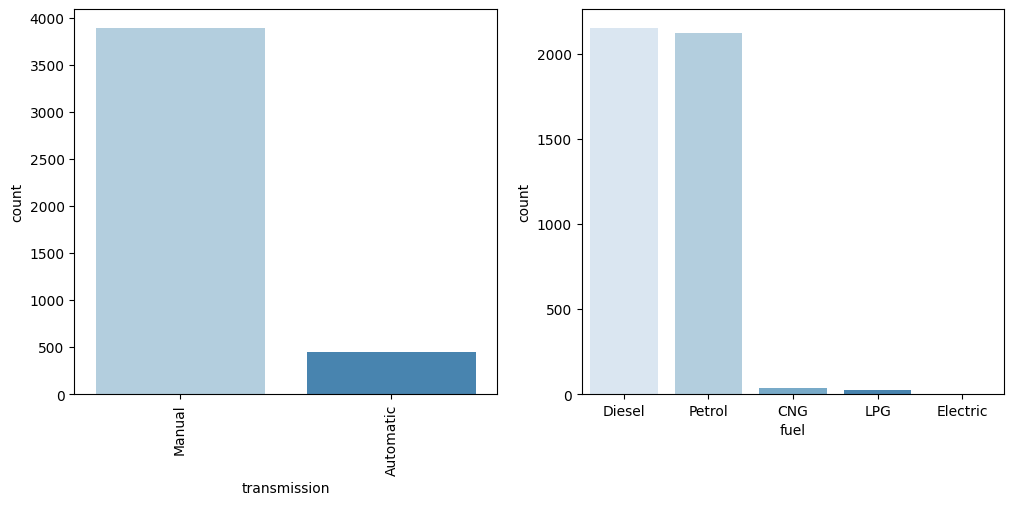

In [7]:
## Countplot
fig = plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot(x = 'transmission', data = data , order = data['transmission'].value_counts().index, palette='Blues'); 
plt.xticks(rotation = 90)
plt.subplot(122)
sns.countplot(x = 'fuel', data = data, order = data['fuel'].value_counts().index, palette='Blues');

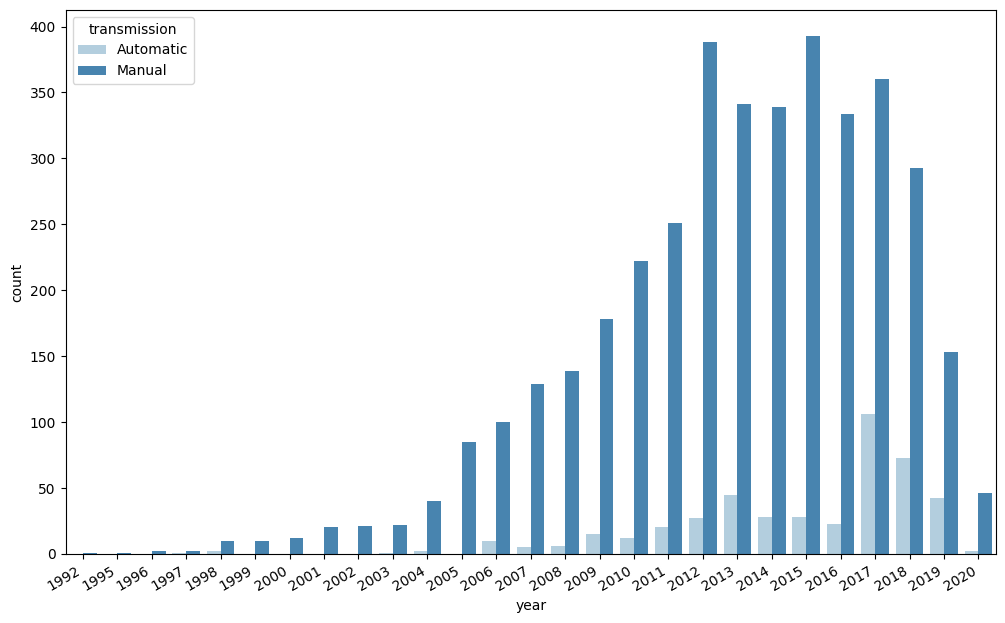

In [8]:
# Un avantage de seaborn est de pouvoir d'afficher un plot en fonction d'une variable !
fig = plt.figure(figsize=(12,8))
sns.countplot(x='year',hue='transmission', data = data, palette='Blues');
fig.autofmt_xdate()

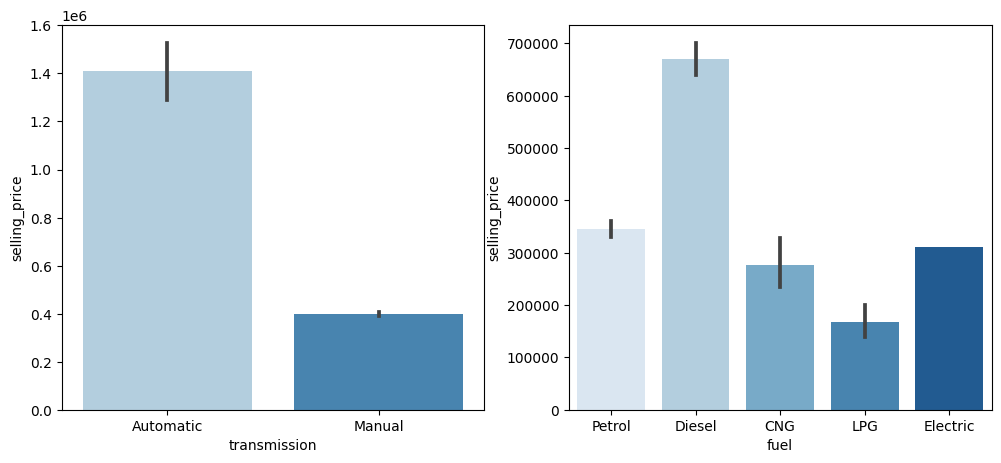

In [9]:
#Barplot, la barre noire représente l'écart type
fig = plt.figure(figsize = (12,5))
plt.subplot(121)
sns.barplot(x='transmission', y='selling_price', data = data, palette='Blues'); 
plt.subplot(122)
sns.barplot(x='fuel', y='selling_price', data = data, palette='Blues');

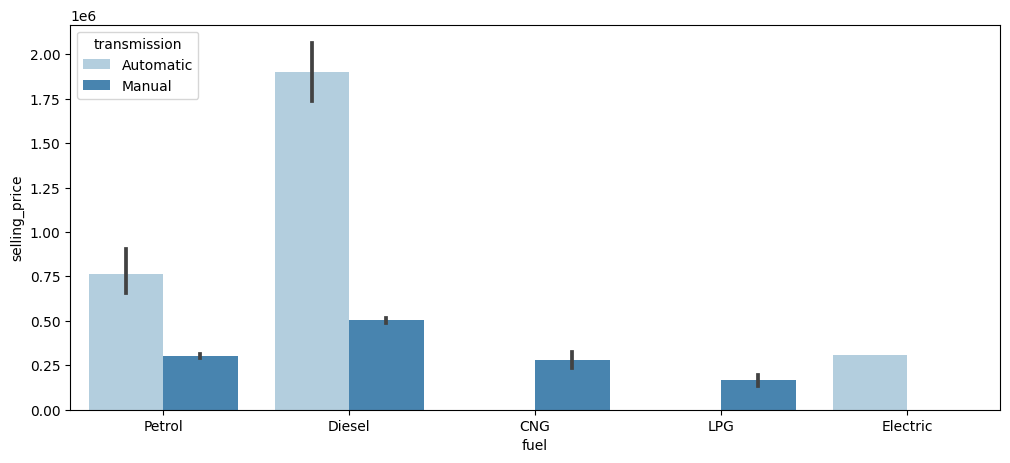

In [10]:
# De la même manière que le countplot !
fig = plt.figure(figsize = (12,5))
sns.barplot(x='fuel',y='selling_price',hue='transmission',data = data, palette='Blues'); #La barre noire représente l'écart type


/home/arthur/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='fuel', ylabel='selling_price'>

/home/arthur/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


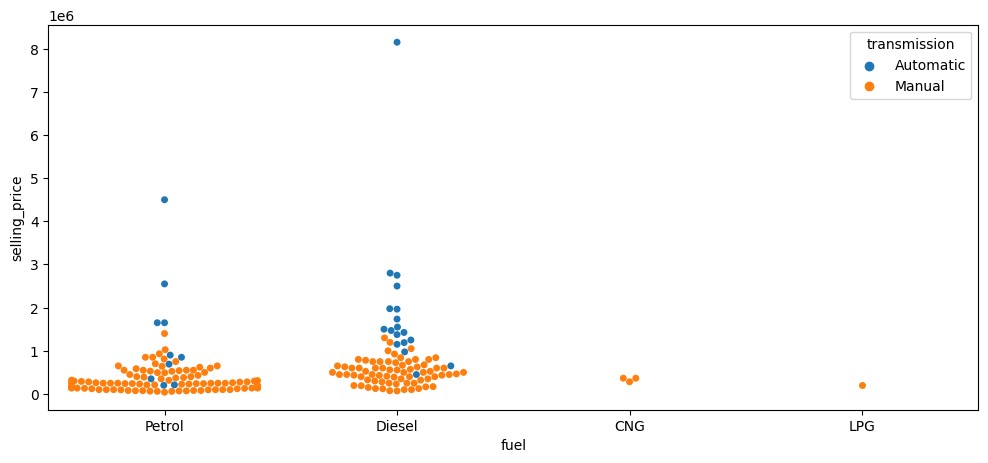

In [11]:
fig = plt.figure(figsize = (12,5))

sns.swarmplot(x='fuel',y='selling_price',hue='transmission',data = data.iloc[:200]) 


### 2. Comment gérer les variables catégorielles ?

Les librairies de machine learning ne permettent généralement pas d'apprendre ou de réaliser des transformations avec des variables catégorielles. Si vous avez des variables object ou category l'erreur suivante apparaitra :

**ValueError: could not convert string to float: [variable]**,
il faut alors les transformer. 

Notez qu'il existe tout de même quelques implémentations d'algorithmes tenant compte des variables de type catégorielle comme nous le verrons dans le cours 6. 

#### 2.1 Label Encoder

C'est la façon la plus naïve de procéder, on va donner un nombre entier correspondant à chaque catégorie.
Par exemple, on a trois types de monstres, on pourrait poser Ghost = 0, Ghoul = 1, Goblin = 2. La fonction **LabelEncoder** de **sklearn** permet de réaliser cette opération.


In [12]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
new_type = Encoder.fit_transform(data['fuel']) #Apprend et transforme les variables catégorielles
print(new_type[:10])
print(Encoder.inverse_transform(new_type)[:10]) # Permet de retransformer les variables. 
#Notons que cela s'applique de manière alphabétique

[4 4 1 4 1 4 4 4 4 0]
['Petrol' 'Petrol' 'Diesel' 'Petrol' 'Diesel' 'Petrol' 'Petrol' 'Petrol'
 'Petrol' 'CNG']


#### 2.2 N-uplet Encoder


N-uplet Encoder permet de transformer une séquence de variables catégorielles en une seule variable. Par exemple, si il y a redondance entre la couleur et le type d'un monstre pourquoi ne pas le définir comme une seule et même variable ? Cela inclut une réduction de dimension qui peut parfois s'avérer cruciale pour les modèles. On peut bricoler cette méthode de la façon suivante.


In [14]:
fuel_transmission = data['fuel'].astype('object')+str(' ')+data['transmission'].astype('object')
#Concatene les catégories en une
print(fuel_transmission[:5])
#On peut compter le nombre de couple unique, pour vérifier que ce n'est pas dangereux de faire cette opération 

print('\nCouples: ')
print(json.dumps(Counter(fuel_transmission), indent=4))

0    Petrol Manual
1    Petrol Manual
2    Diesel Manual
3    Petrol Manual
4    Diesel Manual
dtype: object

Couples: 
{
    "Petrol Manual": 1930,
    "Diesel Manual": 1899,
    "CNG Manual": 40,
    "Petrol Automatic": 193,
    "Diesel Automatic": 254,
    "LPG Manual": 23,
    "Electric Automatic": 1
}


In [15]:
# On encode alors !
Encoder = LabelEncoder()
fuel_transmission = Encoder.fit_transform(fuel_transmission) #Apprend et transforme les variables catégorielles
print (fuel_transmission[:5])

[6 6 2 6 2]


#### 2.3 Binarisation


La binarisation revient à construire pour chaque catégorie d'une variable, un nouveau feature binaire. Par exemple, plutôt que d'avoir une variable type, on aurait une variable pour chaque type existant, avec 1 si le monstre est tel ou tel type. Cela augmente le nombre de dimensions. Mais cela permet parfois une nette amélioration des performances, surtout sur des modèles basés sur des arbres (Breiman). **Get_dummies** de **pandas** permet d'effectuer cette transformation.

In [16]:
print(data['fuel'].head())
print ('\n En binarisant cela devient \n')
pd.get_dummies(data['fuel']).head()

0    Petrol
1    Petrol
2    Diesel
3    Petrol
4    Diesel
Name: fuel, dtype: object

 En binarisant cela devient 



,CNG,Diesel,Electric,LPG,Petrol
0,False,False,False,False,True
1,False,False,False,False,True
2,False,True,False,False,False
3,False,False,False,False,True
4,False,True,False,False,False


#### 2.4 Features composés

Il est possible d'avoir des features catégoriel composés : par exemple une fourchette de prix, ou d'âge. Une bonne manière de les traiter est simplement de les séparer puis d'en extraire des informations supplémentaires.


In [17]:
data_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
data_age['debut'], data_age['fin'] = zip(*data_age['age'].map(lambda x: x.split('-')))
data_age['mediane'] = data_age.loc[:,['debut','fin']].median(axis=1)
data_age.head()


,age,debut,fin,mediane
0,0-20,0,20,10.0
1,20-40,20,40,30.0
2,40-60,40,60,50.0
3,60-80,60,80,70.0


Détérminer la meilleure stratégie n'est pas une chose aisée. Cela dépend de la taille du jeu de données, de l'information apportée par les variables catégorielles et des performances de calcul de vos machines. Une manière de comparer les stratégies est d'effectuer un test de performance avec un modèle simple pour chacune d'entre elles. 

Il existe beaucoup d'autres méthodes comme des encoders fréquentielles, voir le kaggle suivant: https://www.kaggle.com/c/cat-in-the-dat

## Valeurs manquantes

Lors du dernier cours, nous avons vu comment afficher les valeurs manquantes et les compléter de manière naïve. Cette section vise à présenter différentes stratégies plus efficaces pour compléter les valeurs manquantes.


#### 1. Imputation par une statistique ou une valeur quelconque

On peut compléter de manière simple des données manquantes par des statistiques comme la moyenne, la médiane ou la valeur la plus fréquente.
Cette méthode reste cependant très minimaliste et ne permet pas vraiment de gain d'information. Remplir toutes les valeurs manquantes par une même valeur ne permet généralement pas d'améliorer le résultat. **Imputer** de **sklearn** et **fillna** de **pandas** permettent de réaliser cette imputation.

In [18]:
data = data[['selling_price','fuel','year']].iloc[:100]
true_value = data.selling_price

In [19]:
import warnings; warnings.filterwarnings('ignore')
# Pour illustrer remplaçons de manière des observations aléatoire par des nan

ix = np.random.randint(0,data.shape[0],30)
missing_data = data['year']
for i in ix:
    missing_data.loc[i] = np.nan

display(missing_data.head(10))

0       NaN
1    2007.0
2    2012.0
3    2017.0
4       NaN
5       NaN
6    2016.0
7       NaN
8    2015.0
9    2017.0
Name: year, dtype: float64

In [20]:
missing_data.fillna(2023).head(10) # Replace missing value by a dummy one: 2023

0    2023.0
1    2007.0
2    2012.0
3    2017.0
4    2023.0
5    2023.0
6    2016.0
7    2023.0
8    2015.0
9    2017.0
Name: year, dtype: float64

#### 2. Imputation par propagation

Il existe des méthodes d'imputation par propagation avant ou arrière, elles peuvent être pertinentes dans le cas de données temporelles ou de données continuelles type signal. Par exemple, pour compléter une vitesse en fonction de la distance etc...
Si il y a une certaine périodicité cette méthode peut également être utile.
**Imputer** de **sklearn** et **fillna** de **pandas** permettent de réaliser cette imputation.



In [21]:
# Cas forward/backward, on remplace par la valeur suivante/précedente. 

ffill = pd.DataFrame(missing_data.fillna(method='ffill'), columns=['ffill'])
bfill = pd.DataFrame(missing_data.fillna(method='bfill'), columns=['bfill'])

pd.concat([missing_data, 
           missing_data.fillna(method='bfill').rename('bfill'), 
           missing_data.fillna(method='ffill').rename('ffill')],axis=1)

,year,bfill,ffill
0,NaN,2007.0,NaN
1,2007.0,2007.0,2007.0
2,2012.0,2012.0,2012.0
3,2017.0,2017.0,2017.0
4,NaN,2016.0,2017.0
...,...,...,...
95,2015.0,2015.0,2015.0
96,2013.0,2013.0,2013.0
97,2017.0,2017.0,2017.0
98,2013.0,2013.0,2013.0


#### 3. Imputation par régréssion (et apprentissage).

Si les distributions des variables le permettent, on peut compléter les valeurs manquantes en effectuant de l'apprentissage. Il faut cependant choisir très soigneusement ces variables. Nous reviendrons sur cette méthode dans un prochain cours.

#### 4. Imputation par interpolation et splines.
L'idée de l'imputation par interpolation ou par spline repose sur la théorie du signal. La périodicité du signal permet d'interpoler les valeurs pour reconstruire un signal bruité (marche très bien avec les séries temp). Il en va de même pour les splines. Nous verrons ces méthodes plus en détails au cours suivant, car cela permet de lisser des signaux pour la visualisation. La librairie **scipy** possède les fonctions nécéssaires à ces méthodes d'imputation.

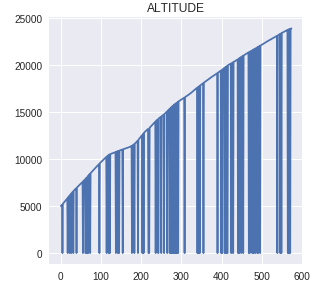

In [22]:
from IPython.display import Image
Image(filename = 'altbefore.png', width=300, height=300)


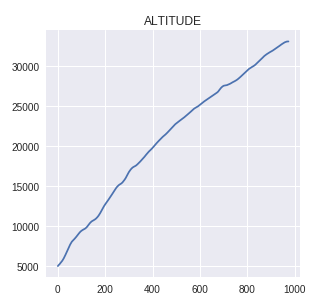

In [23]:
Image(filename = 'altafter.png', width=300, height=300)

#### 5. Imputation par K-NN.

Dans le jeu de données précédent on a remarqué quelques similitudes entre les observations, par exemple avec la redondance de certains couples de variables catégorielle, n'existe-t-il pas alors une façon de compléter des valeurs manquantes par similarité ?

Oui, les k-plus proches voisins ! C'est un algorithme très utilisé en pratique lorsqu'on regarde des observations indépendantes comme des contrats ou des objets sur une chaine de production, par exemple. L'idée est de donner un degré de similarité entre plusieurs observations. On peut par exemple, compléter les valeurs manquantes en choisisant les cinq observations les plus similaires. Pour notre jeu de données, si la couleur d'une observation était absente, nous pourrions la retrouver en choissisant les observations avec des caractéristiques similaires.

C'est un algorithme très puissant, mais qui peut être très coûteux.


#### 6. Cas particulier des variables catégorielles et binaire

Il peut arriver que l'on dispose de données possédant des variables catégorielles et binaires dont leur provenance est inconnue. Une bonne idée pour compléter les variables dans ces cas est d'utiliser leur distribution. Par exemple, pour compléter les valeurs manquantes d'une variable binaire on peut tirer une bernoulli de paramètre #(1)/n et, pour une variable catégorielle faire de la même manière avec une multinomiale.  

#### Conclusion

On a vu qu'il existait diverses méthodes pour compléter les valeurs manquantes, cependant toutes ne sont pas efficaces et dépendent grandement du contexte des données. Il existe également des méthodes beaucoup plus complexes comme l'IterativeSVD, ou MICE. Vous verrez quelques-unes de celles-ci dans le cours de Claire Boyer au second semestre. Si cela vous intéresse, vous pouvez regarder le challenge Netflix et les solutions qui y sont apportées (http://blog.echen.me/2011/10/24/winning-the-netflix-prize-a-summary/). 

## TP - Kaggle : Bike Sharing Demand
Plus d'infos sur https://www.kaggle.com/c/bike-sharing-demand

In [24]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

**1** Exploratory Data Analysis

Deux jeux de données: le jeu d'apprentissage du 01/01/11 au 31/07/12 et le jeu de test du 1/08/12 au 31/12/12.

La variable à prédire est la variable **count** - nombre de vélo disponible à la borne à une date précise.

**1.1** Importer les données, parser la variable datetime de manière à obtenir 4 nouvelles variables : year,month,day & hour. 
Observer un peu le jeu de données, type de données ?


In [25]:
train = pd.read_csv(os.path.join('data', 'train.csv'), parse_dates=['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.weekday #0=lundi ...
train['hour'] = train['datetime'].dt.hour


In [26]:
test = pd.read_csv(os.path.join('data', 'test.csv'), parse_dates=['datetime'])

dt = pd.DatetimeIndex(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.weekday 
test['hour'] = test['datetime'].dt.hour


In [27]:
train.head(5) 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,winter,0,0,clear,9.84,14.395,81,5.18,16,2011,1,5,0
1,2011-01-01 01:00:00,NaN,0,0,clear,9.02,13.635,80,NaN,40,2011,1,5,1
2,2011-01-01 02:00:00,NaN,0,0,clear,9.02,13.635,80,6.32,32,2011,1,5,2
3,2011-01-01 03:00:00,winter,0,0,clear,9.84,14.395,75,NaN,13,2011,1,5,3
4,2011-01-01 04:00:00,winter,0,0,clear,9.84,14.395,75,NaN,1,2011,1,5,4


In [28]:
train.describe()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,day,hour
count,8607,8607.000000,8607.000000,7857.000000,8607.000000,8607.000000,6943.000000,8607.000000,8607.000000,8607.000000,8607.000000,8607.000000
mean,2011-10-11 21:05:07.005925376,0.027768,0.682816,19.961265,23.382848,60.951667,14.515278,173.044150,2011.370048,5.600558,3.014872,11.551644
min,2011-01-01 00:00:00,0.000000,0.000000,0.820000,0.760000,0.000000,3.260000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,2011-05-16 13:30:00,0.000000,0.000000,13.940000,15.910000,46.000000,8.998100,37.000000,2011.000000,3.000000,1.000000,6.000000
50%,2011-10-11 08:00:00,0.000000,1.000000,20.500000,24.240000,60.000000,12.998000,129.000000,2011.000000,5.000000,3.000000,12.000000
75%,2012-03-06 04:30:00,0.000000,1.000000,26.240000,31.060000,77.000000,19.120000,257.500000,2012.000000,8.000000,5.000000,18.000000
max,2012-07-19 23:00:00,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,873.000000,2012.000000,12.000000,6.000000,23.000000
std,NaN,0.164317,0.465407,7.956268,8.667507,19.727106,7.152076,165.189186,0.482845,3.228618,2.000816,6.914326


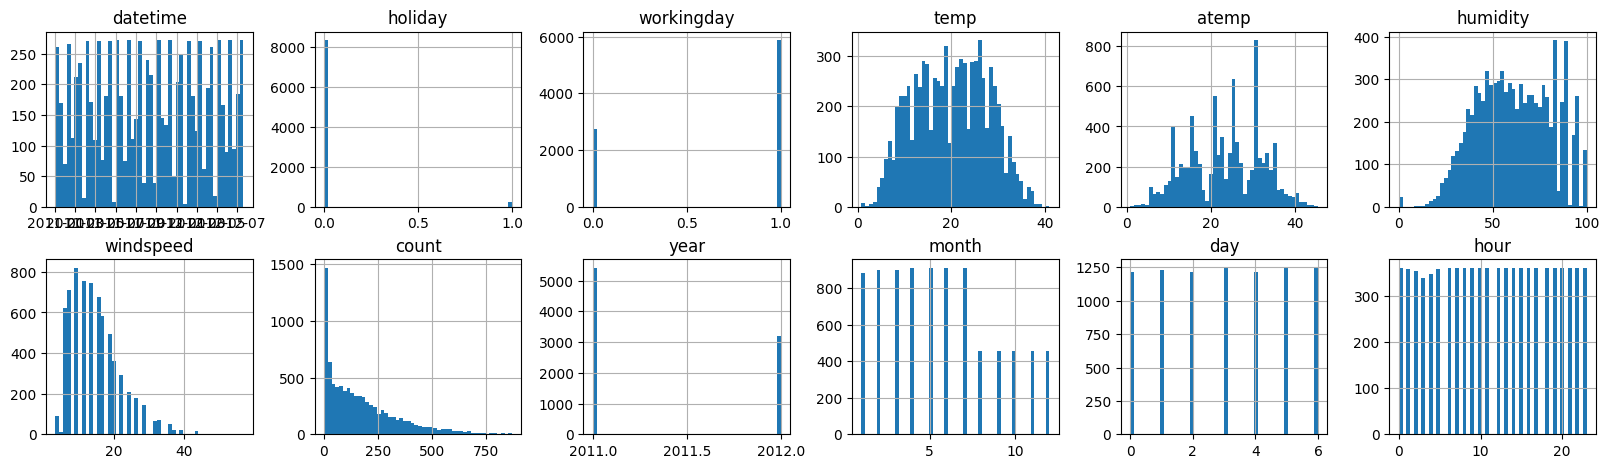

In [29]:
train.hist(figsize=(20, 20), bins=50, layout=(7, 6)); # Variables numériques

**1.2** Regardez la variable cible **count** en fonction des autres variables pour voir celles qui semblent influer.
Pensez à réaliser des boxplots, et autres figures apportant de l'information.

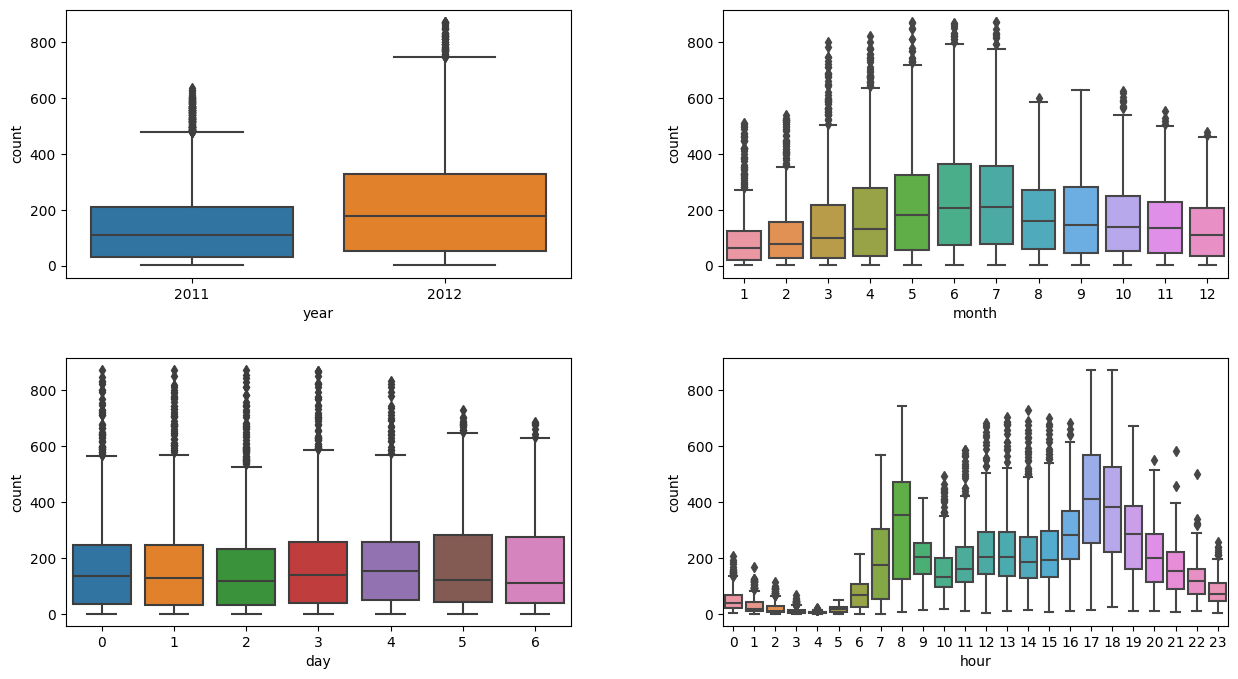

In [30]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=.3,wspace=.3)
sns.boxplot(x='year',y='count',data=train,ax=axs[0]);
sns.boxplot(x='month',y='count',data=train,ax=axs[1]);
sns.boxplot(x='day',y='count',data=train,ax=axs[2]);
sns.boxplot(x='hour',y='count',data=train,ax=axs[3]);

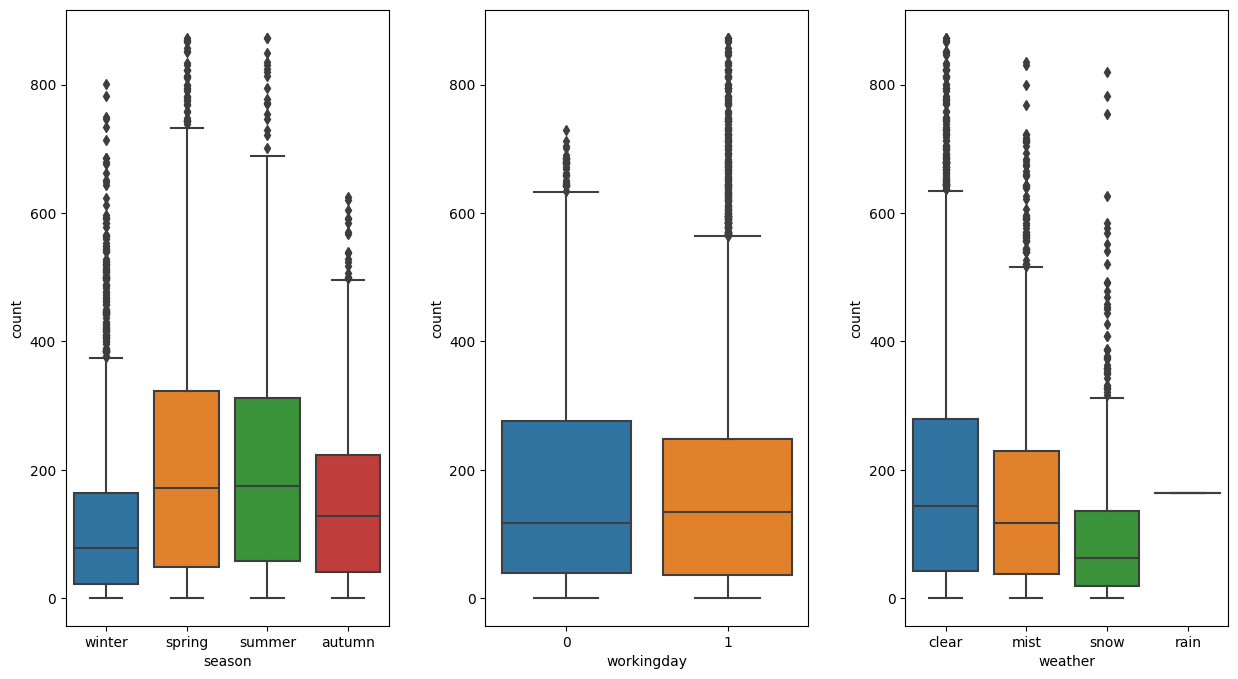

In [31]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=.3,wspace=.3)
sns.boxplot(x='season',y='count',data=train,ax=axs[0]);
sns.boxplot(x='workingday',y='count',data=train,ax=axs[1]);
sns.boxplot(x='weather',y='count',data=train,ax=axs[2]);


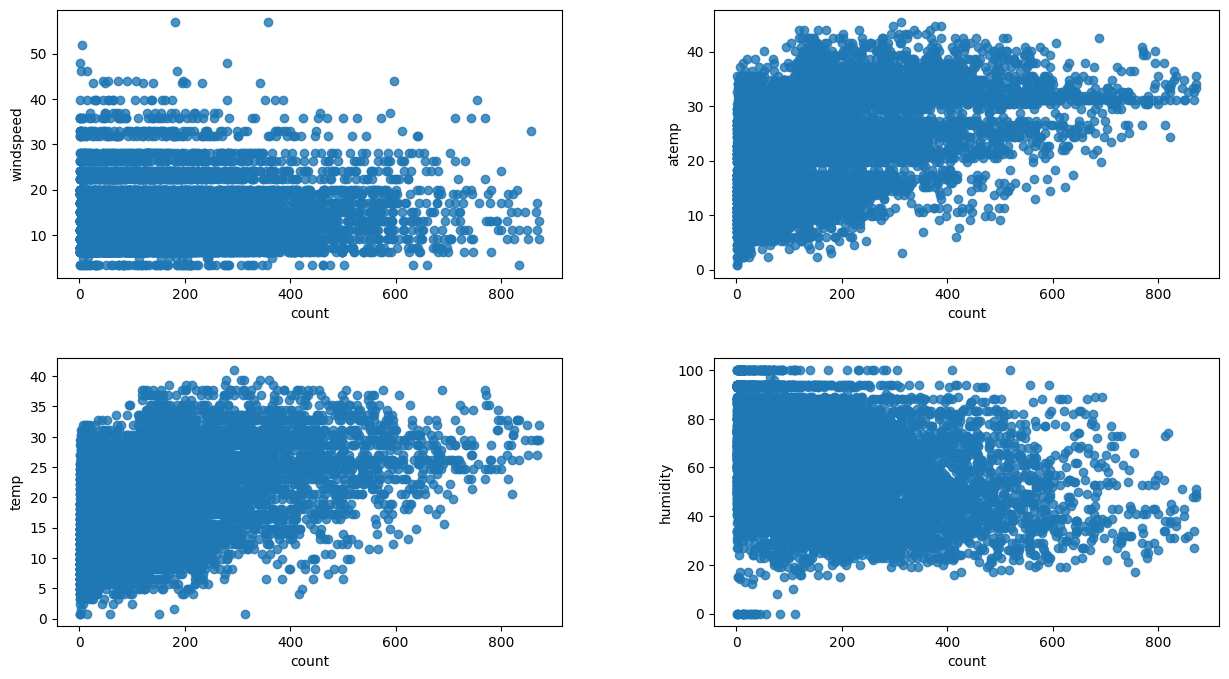

In [32]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
axs = axs.ravel()
fig.subplots_adjust(hspace=.3,wspace=.3)
sns.regplot(y='windspeed', x='count', data=train, ax=axs[0], fit_reg=False);
sns.regplot(y='atemp', x='count', data=train, ax=axs[1], fit_reg=False);
sns.regplot(y='temp', x='count', data=train, ax=axs[2], fit_reg=False);
sns.regplot(y='humidity', x='count', data=train, ax=axs[3], fit_reg=False);


<Axes: >

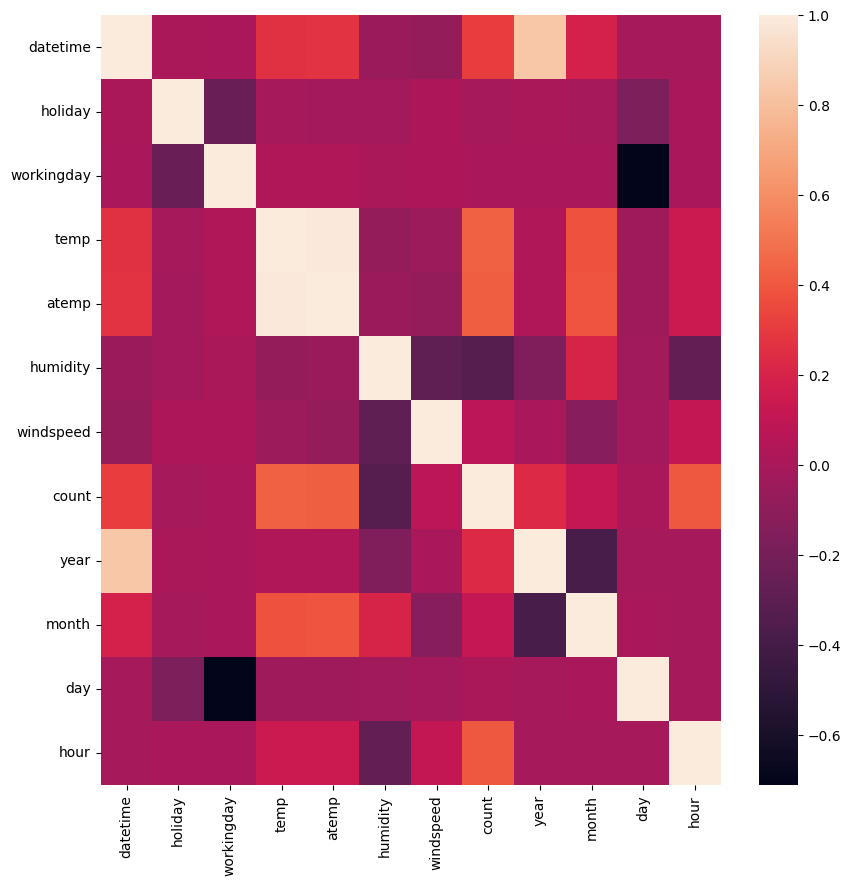

In [33]:
sns.heatmap(train[[c for c in train.columns if train[c].dtype != object]].corr())

**1.3** Regardez les valeurs manquantes dans les deux jeux de données.

In [34]:
# Regardons les NA
def compute_missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print (missing_data[(percent>0)],'\n' )
    return missing_data[(percent>0)].index.tolist()

_ = compute_missing_values(train)
_ = compute_missing_values(test)

           Total  Pourcentage
windspeed   1664     0.193331
season       760     0.088300
temp         750     0.087138
weather      746     0.086674 

           Total  Pourcentage
windspeed    474     0.207986
temp         208     0.091268
weather      206     0.090391
season       195     0.085564 



** 2 ** Valeurs manquantes, comment les compléter ? (N'oubliez pas de les compléter sur les deux jeux !)

** 2.1  ** Trouvez la meilleure méthode pour compléter la variable **season**.

Facile, la saison dépend du mois !

In [35]:
def filling_season(data):
    data.loc[data.month.isin([1,2,3]), 'season'] = 'winter'
    data.loc[data.month.isin([4,5,6]), 'season'] = 'spring'
    data.loc[data.month.isin([7,8,9]), 'season'] = 'summer'
    data.loc[data.month.isin([10,11,12]), 'season'] = 'autumn'
    print ('Filling season : done \n')

In [36]:
filling_season(train)
filling_season(test)

Filling season : done 

Filling season : done 



In [37]:
#On peut vérifier qu'il n'y a pas d'erreurs !
print(train.loc[train.month == 1, 'season'].unique())
print(train.loc[train.month == 10, 'season'].unique())

['winter']
['autumn']


** 2.2  ** Trouvez la meilleure méthode pour compléter la variable **weather**

La solution la plus évident semble d'être de compléter les valeurs manquantes par interpolation - pas besoin de prendre un degré élevé.
Remarquons qu'une manière élégante et potentiellement plus forte serait de prédire la variable weather en fonction des variables ayant de l'influence sur celle-ci, comme par exemple la température, la direction du vent, ou la saison.

In [38]:
train['weather'] = train.weather.fillna(method = 'bfill')
test['weather'] = test.weather.fillna(method = 'bfill')

In [39]:
#Un rapide point de vérification
_ = compute_missing_values(train)
_ = compute_missing_values(test)

           Total  Pourcentage
windspeed   1664     0.193331
temp         750     0.087138 

           Total  Pourcentage
windspeed    474     0.207986
temp         208     0.091268 



** 2.3  ** Trouvez la meilleure méthode pour compléter la variable **windspeed** (Commencez par un plot)

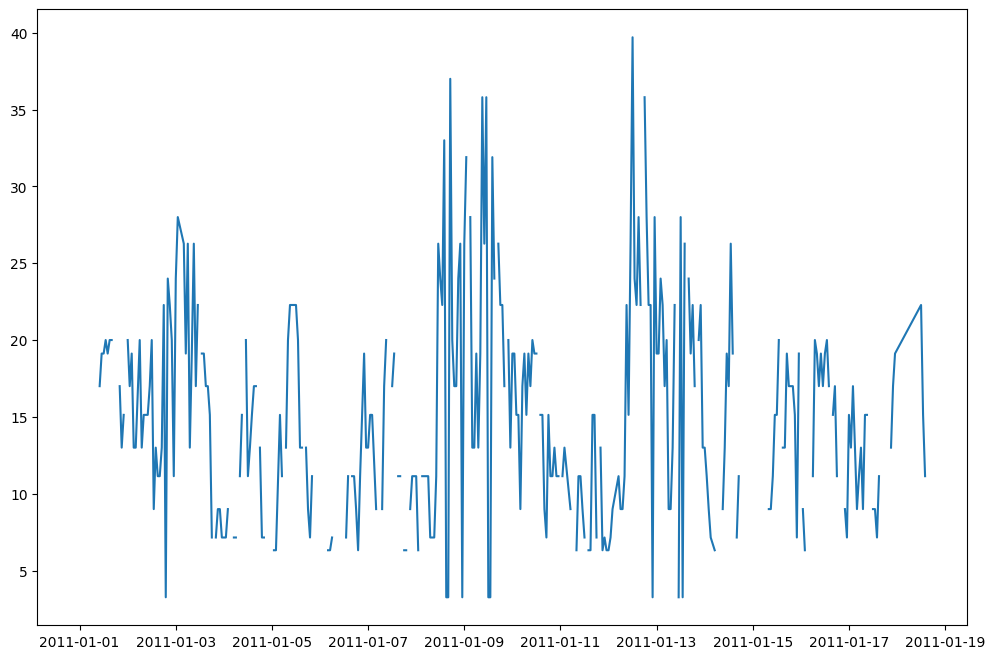

In [40]:
#Commençons par la regarder
plt.figure(figsize=(12,8))
plt.plot(train.datetime.iloc[:400], train.windspeed.iloc[:400]) #Périodicité ?

In [41]:
# Interpolons quadratiquement (point d'inflexions etc) !
train['windspeed'] = train['windspeed'].interpolate('quadratic')
test['windspeed'] = test['windspeed'].interpolate('quadratic')

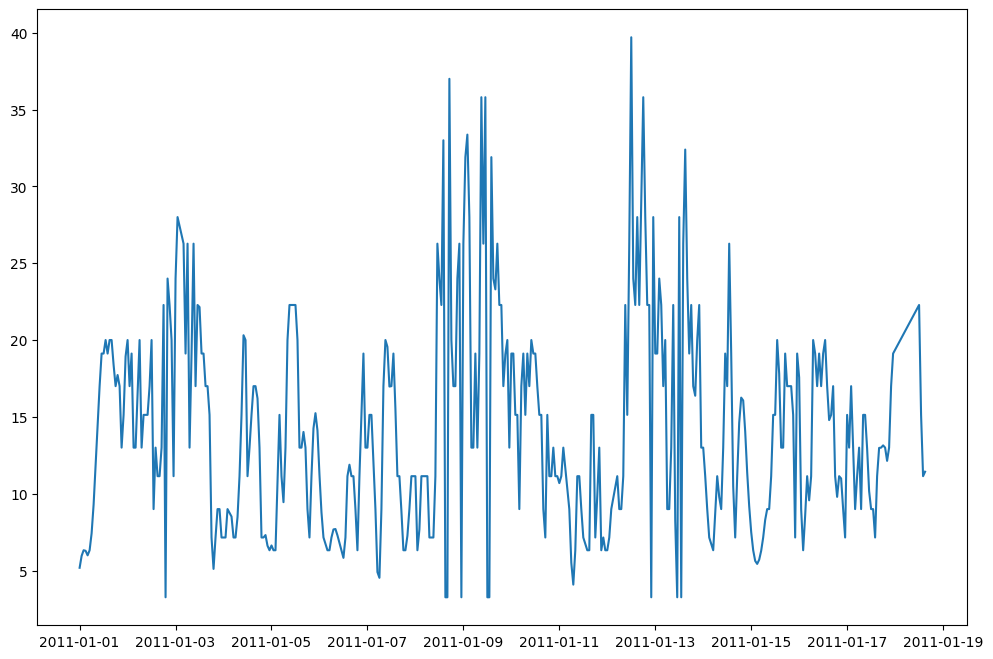

In [42]:
#Commençons par la regarder
plt.figure(figsize=(12,8))
plt.plot(train.datetime.iloc[:400], train.windspeed.iloc[:400]) #Périodicité ?

** 2.4  ** Trouvez la meilleure méthode pour compléter la variable **temp**

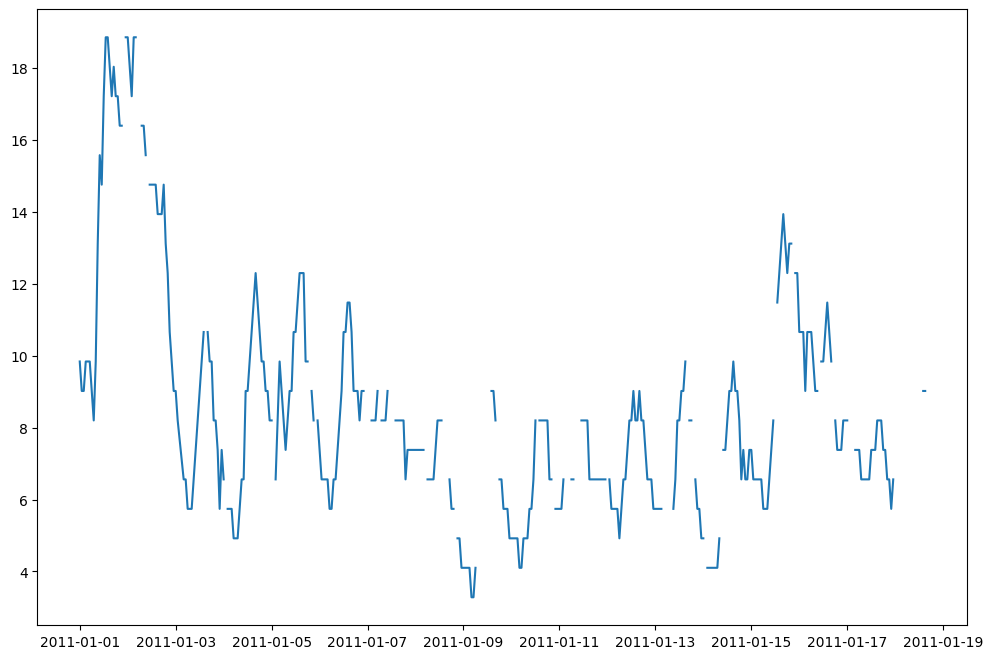

In [43]:
#Commençons par la regarder
plt.figure(figsize=(12,8))
plt.plot(train.datetime.iloc[:400], train.temp.iloc[:400])

In [44]:
#De la même manière, avec une interpolation linéaire cette fois! 
train['temp'] = train['temp'].interpolate('linear')
test['temp'] = test['temp'].interpolate('linear')

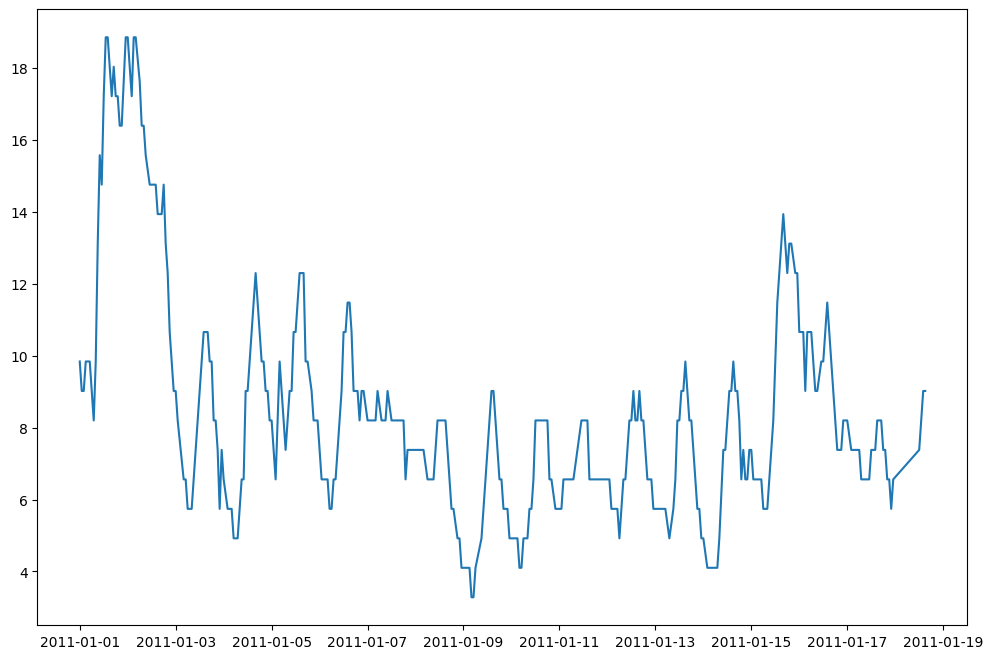

In [45]:
#Commençons par la regarder
plt.figure(figsize=(12,8))
plt.plot(train.datetime.iloc[:400], train.temp.iloc[:400])

In [46]:
#Enfin on vérifie que tout est ok !
_ = compute_missing_values(train)
_ = compute_missing_values(test)

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 

Empty DataFrame
Columns: [Total, Pourcentage]
Index: [] 



**3** Variables catégorielles : Evaluer grâce à deux modèles différent, pour la métrique RMSE, la meilleur stratégie a employé pour transformer les variables catégorielles. N'oubliez pas de récuper la variable cible et supprimer la variable inutile...

/!\ Une transformation effectuée sur le jeu d'apprentissage et à effectuer sur le jeu de test.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state = 1)


In [48]:
y_train = train['count']
train = train.drop(['datetime','count'],axis=1)

y_test = test['count']
test = test.drop(['datetime','count'],axis=1)


**3.1** Only LabelEncoder

In [49]:
train_encoder = train.copy()
test_encoder = test.copy()

for c in train.select_dtypes(object).columns:
    labelencoder = LabelEncoder()
    labelencoder.fit(list(train_encoder[c])+list(test_encoder[c]))
    train_encoder[c] = labelencoder.transform(train_encoder[c])
    test_encoder[c] = labelencoder.transform(test_encoder[c])
    

model_lr.fit(train_encoder,y_train)
print(f'Performance avec seulement des encoders : {rmse(y_test, model_lr.predict(test_encoder))}')

model_rf.fit(train_encoder,y_train)
print(f'Performance avec seulement des encoders : {rmse(y_test, model_rf.predict(test_encoder))}')

Performance avec seulement des encoders : 184.30195834175368
Performance avec seulement des encoders : 73.60555914072987


**3.2** Binarisation

In [50]:
df = pd.concat([train,test])
df = pd.get_dummies(df, columns = ['weather','season'])

print(df.shape)
display(df.head())


(10886, 18)


,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,weather_clear,weather_mist,weather_rain,weather_snow,season_autumn,season_spring,season_summer,season_winter
0,0,0,9.84,14.395,81,5.180000,2011,1,5,0,True,False,False,False,False,False,False,True
1,0,0,9.02,13.635,80,5.952173,2011,1,5,1,True,False,False,False,False,False,False,True
2,0,0,9.02,13.635,80,6.320000,2011,1,5,2,True,False,False,False,False,False,False,True
3,0,0,9.84,14.395,75,6.283482,2011,1,5,3,True,False,False,False,False,False,False,True
4,0,0,9.84,14.395,75,5.989574,2011,1,5,4,True,False,False,False,False,False,False,True


In [51]:
train_bin = df.iloc[:train.shape[0]]
test_bin = df.iloc[train.shape[0]:]
del df

In [52]:
model_lr.fit(train_bin,y_train)
print (f'Performance avec seulement de la binarisation : {rmse(y_test,model_lr.predict(test_bin))}')

model_rf.fit(train_bin,y_train)
print (f'Performance avec seulement de la binarisation : {rmse(y_test,model_rf.predict(test_bin))}')


Performance avec seulement de la binarisation : 184.0552470086144
Performance avec seulement de la binarisation : 76.06936056813154


**3.3** En mélangeant les méthodes !

In [53]:
train_mix = train_bin[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour','season_autumn', 'season_spring',
       'season_summer', 'season_winter']]

test_mix = test_bin[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour','season_autumn', 'season_spring',
       'season_summer', 'season_winter']]

train_mix.loc[:,'weather'] = train_encoder.loc[:,'weather']
test_mix.loc[:,'weather'] = test_encoder.loc[:,'weather']


In [54]:
train_mix.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,month,day,hour,season_autumn,season_spring,season_summer,season_winter,weather
0,0,0,9.84,14.395,81,5.180000,2011,1,5,0,False,False,False,True,0
1,0,0,9.02,13.635,80,5.952173,2011,1,5,1,False,False,False,True,0
2,0,0,9.02,13.635,80,6.320000,2011,1,5,2,False,False,False,True,0
3,0,0,9.84,14.395,75,6.283482,2011,1,5,3,False,False,False,True,0
4,0,0,9.84,14.395,75,5.989574,2011,1,5,4,False,False,False,True,0


In [55]:

model_lr.fit(train_mix,y_train)
print(f'Performance avec mélange : {rmse(y_test,model_lr.predict(test_mix))}')


model_rf.fit(train_mix,y_train)
print(f'Performance avec mélange : {rmse(y_test,model_rf.predict(test_mix))}')


Performance avec mélange : 184.2018228456927
Performance avec mélange : 75.9495632832891


In [56]:
train_mix = train_bin[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour','weather_clear','weather_mist','weather_rain','weather_snow']]

test_mix = test_bin[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour','weather_clear','weather_mist','weather_rain','weather_snow']]

train_mix.loc[:,'season'] = train_encoder.loc[:,'season']
test_mix.loc[:,'season'] = test_encoder.loc[:,'season']


In [57]:

model_lr.fit(train_mix,y_train)
print(f'Performance avec mélange : {rmse(y_test,model_lr.predict(test_mix))}')


model_rf.fit(train_mix,y_train)
print(f'Performance avec mélange : {rmse(y_test,model_rf.predict(test_mix))}')

Performance avec mélange : 184.11771167229026
Performance avec mélange : 74.36950836330176


** 4.4 ** - Si on a le temps, sinon pour dans deux semaines  : 
En effectuant des transformations sur les données et en choisissant un bon modèle essayez d'obtenir un score inférieur à 0.73. 

On pourrait :
-  Supprimer des variables, comme atemp très corrélé avec temp
-  Transformer les données
-  Utiliser de meilleurs modèles optimisés + arrondies
-  Utiliser des modèles différents par saison ou mois.
-  Chercher des modèles par clusters 
-  Construire des variables intelligentes, comme par exemple des moyennes par saisons.

In [58]:
from sklearn.model_selection import KFold
import xgboost as xgb

train = np.array(train_encoder)
test = np.array(test_encoder)
xgb_preds = []
target = np.log1p(y_train)
K = 5
kf = KFold(n_splits = K,random_state=1, shuffle = True)

for train_index, test_index in kf.split(train):
    train_X, valid_X = train[train_index], train[test_index]
    train_y, valid_y = target[train_index], target[test_index]

    xgb_params = {'objective': 'count:poisson', 'silent': True,'verbose':0,'eta':0.5,'min_child_weight':10, 'max_depth':6}
    d_train = xgb.DMatrix(train_X, train_y)
    d_valid = xgb.DMatrix(valid_X, valid_y)
    d_test = xgb.DMatrix(test)
    
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    model = xgb.train(xgb_params, d_train, 5000,  watchlist,  maximize=True,verbose_eval=False, early_stopping_rounds=100)
                        
    xgb_pred = model.predict(d_test)
    xgb_preds.append(list(xgb_pred))


preds=[]
for i in range(len(xgb_preds[0])):
    sum=0
    for j in range(K):
        sum+=xgb_preds[j][i]
    preds.append(sum / K)
  
preds = np.expm1(preds)

[11:47:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.

[11:47:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.

[11:47:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.

[11:47:23] WARNING: ../src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.

[11:47:23] WARNING: ../src/learner.cc:767: 
Parameters: { "silent", "verbose" } are not used.



In [59]:
print ('Performance atteignable facilement : ',rmse(y_test,preds))

Performance atteignable facilement :  67.48987142787237
